In [9]:
#API key has been taken out of code
import pandas as pd
import json
import requests

In [10]:
def get_stock_info(stock, apikey=''): #API key was here
  url = "https://yfapi.net/v6/finance/quote"
  querystring = {"symbols": stock}
  headers = {'x-api-key': apikey}
  response = requests.request("GET", url, headers=headers, params=querystring)

  url2 = "https://yfapi.net/v11/finance/quoteSummary/" + stock + "?modules=financialData"
  response2 = requests.request("GET", url2, headers=headers, params=querystring)

  stock_json = response.json()
  stock2_json = response2.json()

  try:
    print("Ticker:", stock)
    full_name = stock_json['quoteResponse']['result'][0]["longName"]
    print("Full Name:", full_name)
    current_price = stock_json['quoteResponse']['result'][0]["regularMarketPrice"]
    print("Current Market Price: $", current_price)

    if 'quoteSummary' in stock2_json and 'result' in stock2_json['quoteSummary'] and stock2_json['quoteSummary']['result']:
       target_mean_price = stock2_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw']
       print("Target Mean Price:", target_mean_price)
    else:
       print("Target Mean Price: Not Found")

    week52_high = stock_json['quoteResponse']['result'][0]['fiftyTwoWeekHigh']
    print("52 Week High: $", week52_high)
    week52_low = stock_json['quoteResponse']['result'][0]['fiftyTwoWeekLow']
    print("52 Week Low: $", week52_low)

  except KeyError:
    print("Error: Could not retrieve stock information. Please check the stock try again.")

In [11]:
#User input for stock
user_stock=input()
print(get_stock_info(user_stock))

AAPL
Ticker: AAPL
Full Name: Apple Inc.
Current Market Price: $ 227.725
Target Mean Price: 240.58
52 Week High: $ 237.23
52 Week Low: $ 164.08
None


In [12]:
#Output 5 of the current trending stocks
def get_trending_stocks(apikey='', num_stocks=5): #API key was here
  url = "https://yfapi.net/v1/finance/trending/US"
  headers = {'x-api-key': apikey}
  response = requests.request("GET", url, headers=headers)
  stock_json = response.json()
  count = 0
  for stock_data in stock_json['finance']['result'][0]['quotes']:
    if count < num_stocks:
      print(stock_data['symbol'])
      get_stock_info(stock_data['symbol'])
      count += 1
    else:
      break

print(get_trending_stocks())

AMSC
Ticker: AMSC
Full Name: American Superconductor Corporation
Current Market Price: $ 22.98
Target Mean Price: 30.33
52 Week High: $ 32.7
52 Week Low: $ 5.78
XRP-USD
Ticker: XRP-USD
Full Name: XRP USD
Current Market Price: $ 0.65263385
Target Mean Price: Not Found
52 Week High: $ 0.742126
52 Week Low: $ 0.391139
RACE
Ticker: RACE
Full Name: Ferrari N.V.
Current Market Price: $ 471.68
Target Mean Price: 485.69
52 Week High: $ 498.23
52 Week Low: $ 293.49
PWR
Ticker: PWR
Full Name: Quanta Services, Inc.
Current Market Price: $ 296.74
Target Mean Price: 292.35
52 Week High: $ 306.5
52 Week Low: $ 153.74
BBD
Ticker: BBD
Full Name: Banco Bradesco S.A.
Current Market Price: $ 2.71
Target Mean Price: 3.38
52 Week High: $ 3.65
52 Week Low: $ 2.16
None


In [15]:
import pandas as pd
import json
import requests

stock_data_list = []


def fetch_stock_data(stock, apikey=''): #API key was here
    url = "https://yfapi.net/v6/finance/quote"
    headers = {'x-api-key': apikey}
    querystring = {"symbols": stock}

    response = requests.get(url, headers=headers, params=querystring)
    stock_json = response.json()

    # To see if 'quoteResponse' key exists in stock_json
    if 'quoteResponse' not in stock_json:
        print(f"Error: Unexpected API response for {stock}.")
        return None

    if not stock_json['quoteResponse']['result']:
        print(f"Error: Stock {stock} not found.")
        return None

    stock_info = stock_json['quoteResponse']['result'][0]
    stock_data = {
        "Ticker": stock_info.get("symbol"),
        "Full Name": stock_info.get("longName"),
        "Current Price": stock_info.get("regularMarketPrice"),
        "52 Week High": stock_info.get("fiftyTwoWeekHigh"),
        "52 Week Low": stock_info.get("fiftyTwoWeekLow")
    }

    stock_data_list.append(stock_data)


def save_to_csv():
    df = pd.DataFrame(stock_data_list)
    df.to_csv('stock_data.csv', index=False)
    print("Data saved to stock_data.csv")


def get_trending_stocks(apikey='', num_stocks=5): #API key was here
    url = "https://yfapi.net/v1/finance/trending/US"
    headers = {'x-api-key': apikey}

    response = requests.get(url, headers=headers)
    trending_json = response.json()

    # I kept getting an error here regarding the word 'finance', so used AI to debug.
    if 'finance' in trending_json and 'result' in trending_json['finance'] and trending_json['finance']['result']:
        for stock_data in trending_json['finance']['result'][0]['quotes'][:num_stocks]:
            stock = stock_data['symbol']
            fetch_stock_data(stock)
    else:
        print("Error: Unexpected API response format for trending stocks.")


def main():
    user_stock = input("Enter stock ticker symbol: ")
    fetch_stock_data(user_stock)

    get_trending_stocks()

    save_to_csv()

# Used built in AI to help with this part, and learned what __name__ does
if __name__ == "__main__":
    main()

Enter stock ticker symbol: AAPL
Data saved to stock_data.csv


[*********************100%***********************]  1 of 1 completed


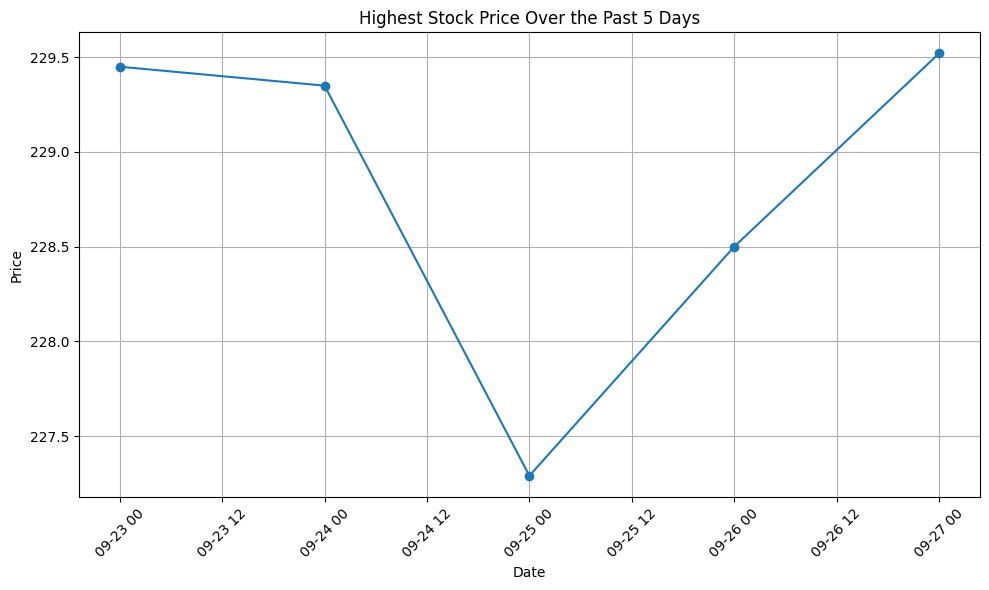

In [17]:
#Bonus question

!pip install yfinance matplotlib --upgrade
import yfinance as yf
import matplotlib.pyplot as plt

stock = yf.download("AAPL", period="5d")
daily_high = stock["High"]

plt.figure(figsize=(10, 6))
plt.plot(daily_high.index, daily_high.values, marker="o", linestyle="-")
plt.title("Highest Stock Price Over the Past 5 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Display
